# Dataset 


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [3]:
# Loading the data frame
df = pd.read_csv('bengaluru_house_rent.csv')
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,rent
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
display(df)

,area_type,availability,location,size,society,total_sqft,bath,balcony,rent
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
# Printing the shape of dataframe
print(df.shape)

(13320, 9)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   rent          13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
print(df.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'rent'],
      dtype='object')


In [8]:
# Making a list of important features which is need to be included in training data
f = ['bath', 'balcony', 'rent']

df1 = df[f]
print(df1.shape)

(13320, 3)


In [9]:
# Dropping the missing values
df2 = df1.dropna()
print(df2.shape)

(12711, 3)


In [10]:
# Getting statictial information about the dataframe
df2.describe()

,bath,balcony,rent
count,12711.000000,12711.000000,12711.000000
mean,2.617339,1.584376,106.059200
std,1.225956,0.817263,131.761025
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.040000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [11]:
# Now , dividing the dataset into two parts : independent variables and dependent variables
X = df2[f[1:]]
y = df2['rent']

In [12]:
# Spliting the dataset into traning data and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(11439, 2)
(1272, 2)
(11439,)
(1272,)


In [13]:
# Fit the regression model
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)

[1.0681205e-14 1.0000000e+00]


In [14]:
# Create the predictions
y_test_predict = lr.predict(X_test)
print(y_test_predict.shape)

(1272,)


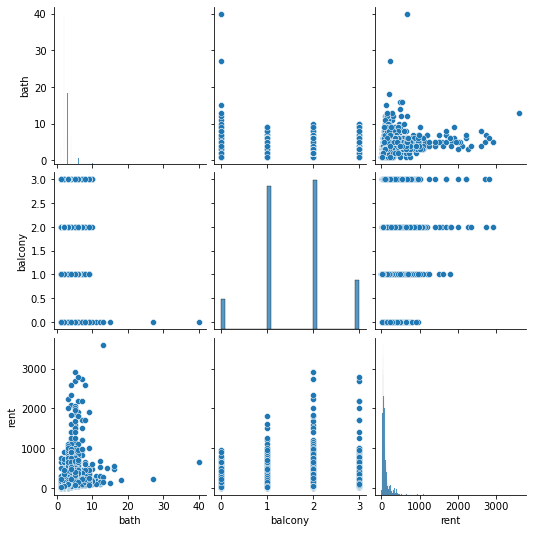

In [15]:
sns.pairplot(df)

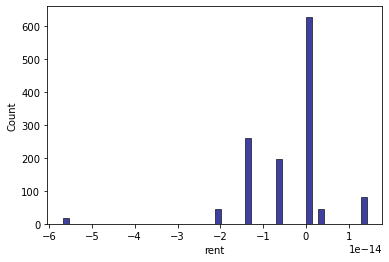

In [16]:
sns.histplot((y_test-y_test_predict),bins=50,color='navy'); 

<AxesSubplot:>

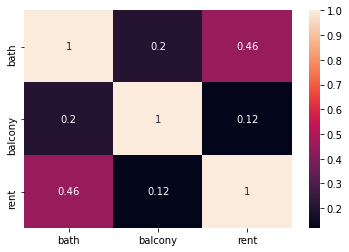

In [17]:
sns.heatmap(df.corr(),annot=True)

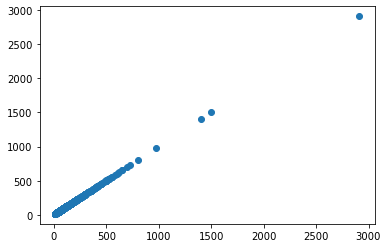

In [18]:
plt.scatter(y_test,y_test_predict)

In [19]:
print(lr.coef_)

[1.0681205e-14 1.0000000e+00]


In [20]:
print(y_test)

12716    125.00
10172     69.57
3060      45.00
319       51.00
8353     160.00
          ...  
12179     88.00
8608      82.00
5046      80.00
5938     400.00
5726      32.00
Name: rent, Length: 1272, dtype: float64


In [21]:
print (y_test_predict)

[125.    69.57  45.   ...  80.   400.    32.  ]


In [22]:
#Check accuracy using MSE
print(np.mean( (y_test_predict - y_test )**2))

1.262177448353619e-28


In [23]:
#Check accuray using MSE & skilearn.metrics
from sklearn.metrics import mean_squared_error
print (mean_squared_error(y_test,y_test_predict))

1.262177448353619e-28


In [24]:
print('The score of Variance is %.2f'% lr.score(X_test,y_test))

The score of Variance is 1.00


In [25]:
from sklearn.tree import DecisionTreeRegressor
lr2=DecisionTreeRegressor()
lr2.fit(X_train,y_train)

DecisionTreeRegressor()

In [26]:
print('The score of Variance is %.2f'% lr2.score(X_test,y_test))

The score of Variance is 1.00


In [27]:
from sklearn.linear_model import Lasso
lr3=Lasso(alpha=0.02)
lr3.fit(X_train,y_train)

Lasso(alpha=0.02)

In [28]:
print('The score of Variance is %.2f'% lr3.score(X_test,y_test))

The score of Variance is 1.00
